In [1]:
#Creating a model to predict wheather a passenger in Titanic survived or not

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
df= pd.read_csv(r"C:\Users\NISHA\Desktop\yashikaclg\Titanic-Dataset.csv", encoding = 'unicode_escape')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

In [11]:
mode_emb= df["Embarked"].mode()
df["Embarked"]= df["Embarked"].fillna(mode_emb)

In [12]:
median_fare= df["Fare"].median()
df["Fare"]= df["Fare"].fillna(median_fare)

In [13]:
print(df[["Age","Embarked","Fare"]])

      Age Embarked     Fare
0    22.0        S   7.2500
1    38.0        C  71.2833
2    26.0        S   7.9250
3    35.0        S  53.1000
4    35.0        S   8.0500
..    ...      ...      ...
886  27.0        S  13.0000
887  19.0        S  30.0000
888  28.0        S  23.4500
889  26.0        C  30.0000
890  32.0        Q   7.7500

[891 rows x 3 columns]


In [14]:
df["Sex"]=df["Sex"].map({"male":0, "female":1})

In [15]:
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

In [16]:
df.drop(["Cabin", "Ticket", "Name", "PassengerId"], axis=1, inplace=True)
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,889.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.362205
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.636157
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [17]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:

rr = RandomForestClassifier(n_estimators=100, random_state=42)
rr.fit(X_train, y_train)
#Predicting the values
y_pred = rr.predict(X_test)
#Evaluating Accuracy Score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8268156424581006
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Confusion Matrix:
[[92 13]
 [18 56]]


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

<function matplotlib.pyplot.show(close=None, block=None)>

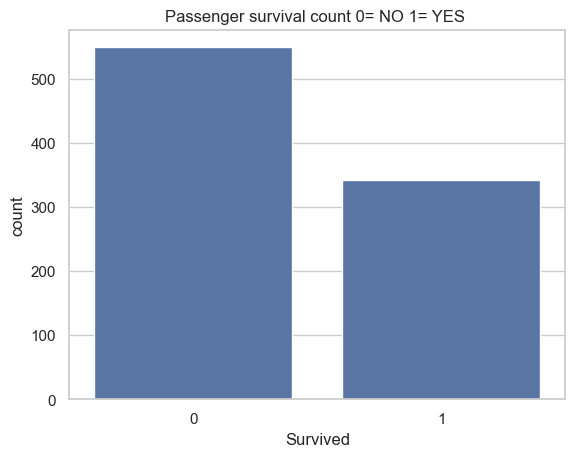

In [24]:
sns.countplot(x= "Survived", data= df)
plt.title('Passenger survival count 0= NO 1= YES ')
plt.show

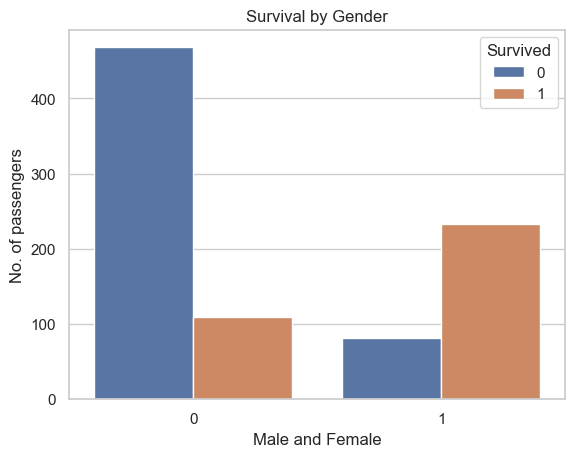

In [31]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.xlabel("Male and Female")
plt.ylabel("No. of passengers")
plt.show()

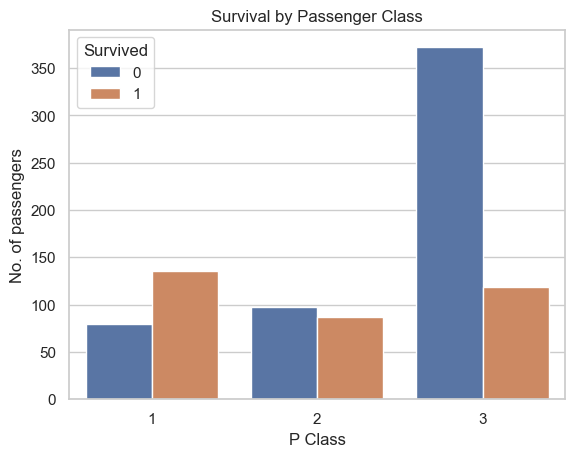

In [33]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.ylabel("No. of passengers")
plt.xlabel("P Class")
plt.show()

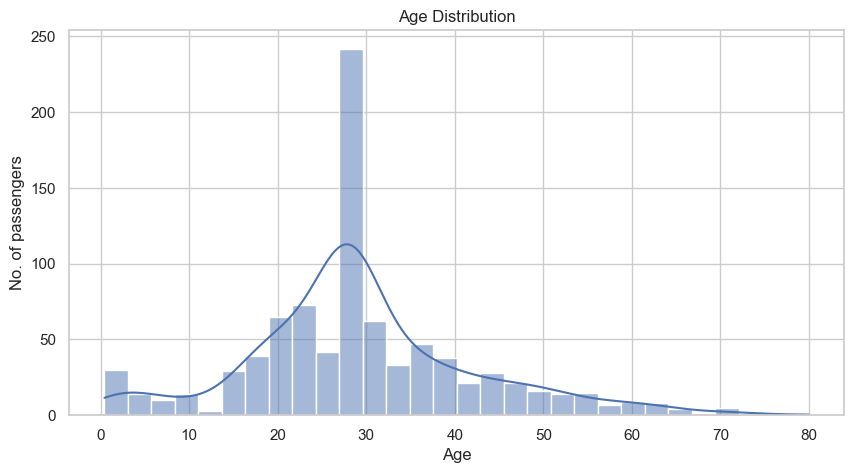

In [34]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.ylabel("No. of passengers")
plt.show()

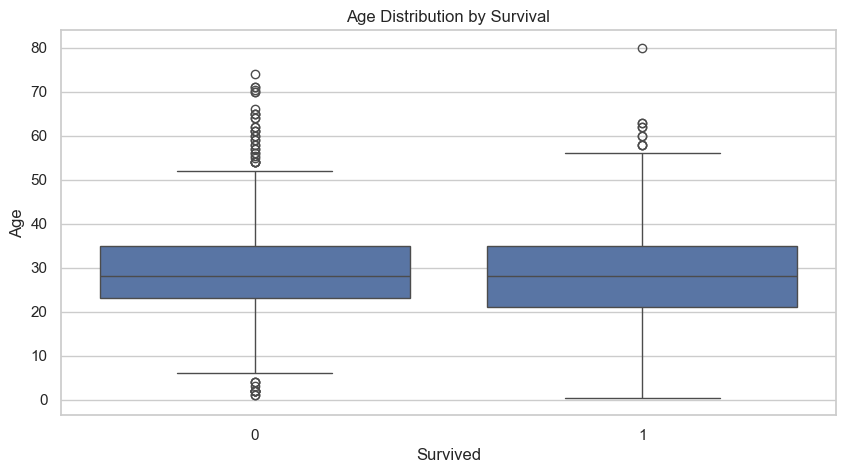

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()

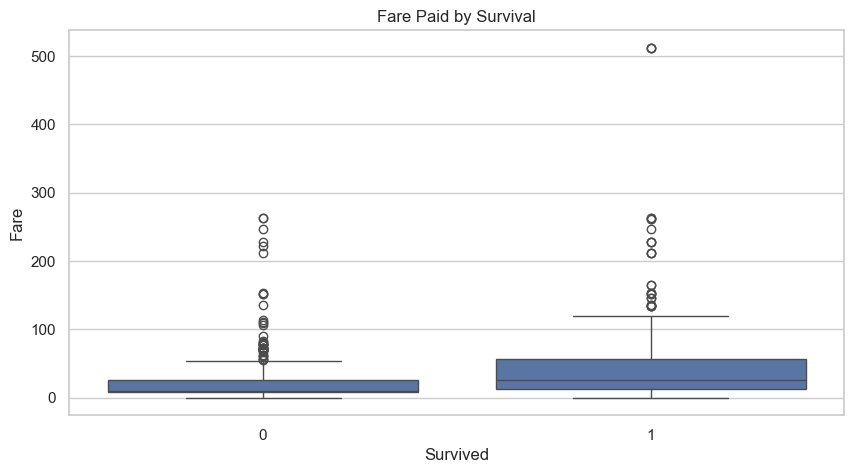

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare Paid by Survival")
plt.show()

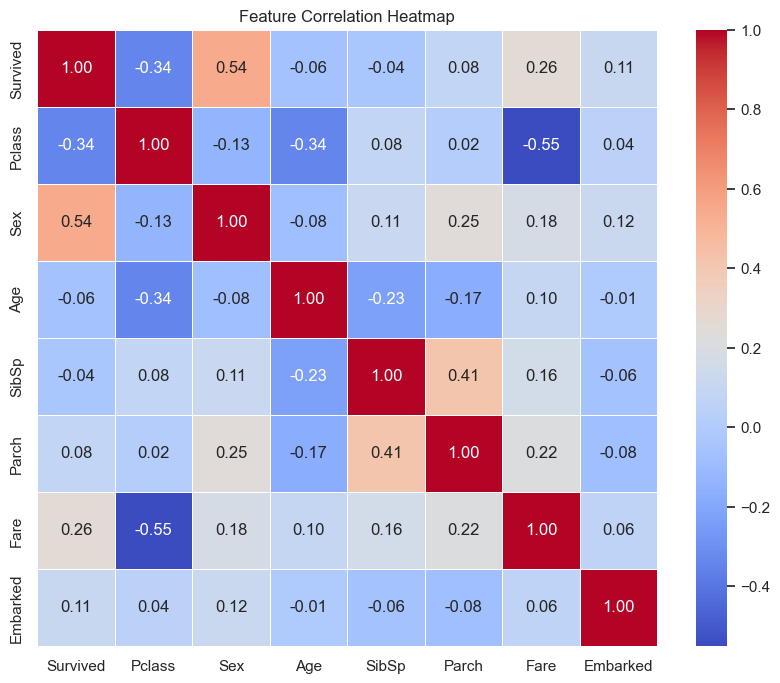

In [25]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()